In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the dataset
df = pd.read_csv('/Users/rawanghanemhmx/Desktop/Task1/insurance.csv')

In [4]:
df_binary = df[['bmi', 'charges']]

print(df_binary)
# print(df)

         bmi      charges
0     27.900  16884.92400
1     33.770   1725.55230
2     33.000   4449.46200
3     22.705  21984.47061
4     28.880   3866.85520
...      ...          ...
1333  30.970  10600.54830
1334  31.920   2205.98080
1335  36.850   1629.83350
1336  25.800   2007.94500
1337  29.070  29141.36030

[1338 rows x 2 columns]


In [5]:
# assign bmi & charges columns to the appropriate variables
x = df['bmi']
y = df['charges']

In [6]:
def linear_regression(x, y):    
#     get the number of observations
    N = len(x)
#     calculate the mean
    x_mean = x.mean()
    y_mean = y.mean()
#     numerator
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
#     denominator
    B1_den = ((x - x_mean)**2).sum()
#     Beta1 to calculate the slope
    B1 = B1_num / B1_den
 
    B0 = y_mean - (B1*x_mean)
#     get the equation to Calculate the linear regression 
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [7]:
def corr_coef(x, y):
    N = len(x)
    
    numerator = (N * (x*y).sum()) - (x.sum() * y.sum())
    denominator = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = numerator / denominator
    return R

In [9]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
# R is Pearson Correlation Coefficient
r2 = corr_coef(x, y)
print('Correlation Coef.: ', r2)
print('Goodness of Fit:', r2**2)

Regression Line:  y = 1192.9372089611516 + 393.873β
Correlation Coef.:  0.19834096883362778
Goodness of Fit: 0.03933913991786211


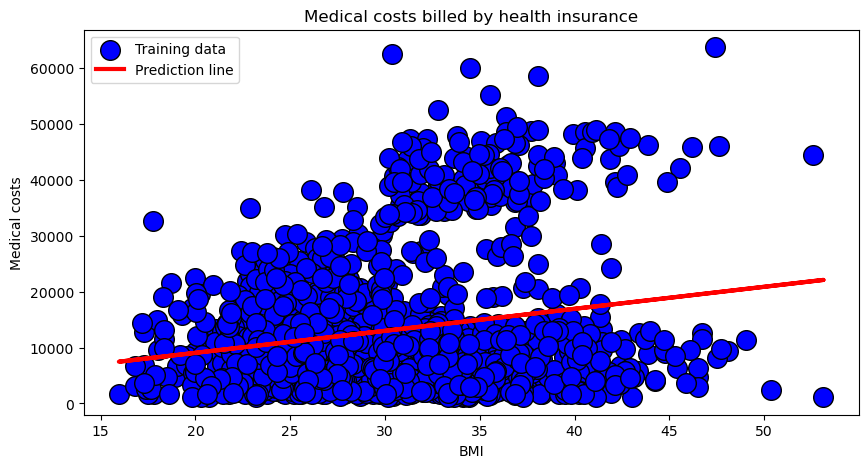

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, color = 'blue', label='Training data', s=200, linewidths=1, edgecolor='black')
plt.plot(x, B0 + B1*x, color = 'red',label='Prediction line', linewidth=3)
plt.title('Medical costs billed by health insurance')
plt.xlabel('BMI')
plt.ylabel('Medical costs')

plt.legend()
plt.show()